In [22]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt # plotting (optional)
%matplotlib inline 

In [3]:
data = pd.read_csv('../data/dem_with_dummies_renamed.csv')

In [4]:
data = data.drop(['Unnamed: 0', 'Candidate', 'State', 'Primary_Vote_Percentage'], axis = 1)

In [5]:
colnames = list(data)

In [6]:
formula = "Primary_Status_Advanced ~ "
for name in colnames:
    if(name != 'Primary_Status_Advanced'):
        formula = formula + name + " + "

In [7]:
formula = formula[0:-3]

In [8]:
formula

'Primary_Status_Advanced ~ Neutral_Endorsements + Yes_Endorsements + No_Endorsements + Office_Type_Governor + Office_Type_Representative + Office_Type_Senator + Race_Nonwhite + Race_Unknown + Race_White + Veteran__No + Veteran__Unknown + Veteran__Yes + LGBTQ__No + LGBTQ__Unknown + LGBTQ__Yes + Elected_Official__Yes + Self_Funder__Yes + STEM__No + STEM__Unknown + STEM__Yes + Obama_Alum__Yes + Party_Support__Neutral + Party_Support__No + Party_Support__Yes'

In [9]:
train_features, test_features, train_outcome, test_outcome = train_test_split(
    data.drop('Primary_Status_Advanced', axis=1),
    data['Primary_Status_Advanced'],
    test_size = 0.3,
    random_state = 11
)

In [10]:
train_features['Primary_Status_Advanced'] = (train_outcome).to_frame()

In [29]:
formula2 = 'Primary_Status_Advanced ~ Neutral_Endorsements + Yes_Endorsements + Office_Type_Representative + Office_Type_Senator + Race_White + Veteran__Yes + LGBTQ__Unknown + LGBTQ__Yes + Elected_Official__Yes + Self_Funder__Yes + STEM__Yes + Party_Support__No + Party_Support__Yes'


In [30]:
multiple = smf.ols(formula2, data=train_features).fit()
# Then, use the `.summary()` method of your model to print our information about your model
multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Primary_Status_Advanced   R-squared:                       0.261
Model:                                 OLS   Adj. R-squared:                  0.243
Method:                      Least Squares   F-statistic:                     14.99
Date:                     Mon, 03 Dec 2018   Prob (F-statistic):           3.63e-29
Time:                             00:49:33   Log-Likelihood:                -294.03
No. Observations:                      567   AIC:                             616.1
Df Residuals:                          553   BIC:                             676.8
Df Model:                               13                                         
Covariance Type:                 nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.7229      0.135     -5.339      0.000      -0.989      -0.457
Neutral_Endorsements           0.0813      0.012      6.738      0.000       0.058       0.105
Yes_Endorsements               0.1682      0.021      7.994      0.000       0.127       0.210
Office_Type_Representative     0.1399      0.055      2.534      0.012       0.031       0.248
Office_Type_Senator            0.1357      0.120      1.130      0.259      -0.100       0.372
Race_White                     0.0519      0.036      1.457      0.146      -0.018       0.122
Veteran__Yes                  -0.0432      0.048     -0.897      0.370      -0.138       0.051
LGBTQ__Unknown                -0.2453      0.188     -1.304      0.193      -0.615       0.124
LGBTQ__Yes                    -0.0599      0.086     -0.693      0.488      -0.229       0.110
Elected_Official__Yes          0.0682      0.051      1.349      0.178      -0.031       0.167
Self_Funder__Yes               0.1083      0.077      1.406      0.160      -0.043       0.260
STEM__Yes                     -0.1054      0.045     -2.360      0.019      -0.193      -0.018
Party_Support__No             -0.1894      0.057     -3.330      0.001      -0.301      -0.078
Party_Support__Yes             0.4722      0.081      5.858      0.000       0.314       0.631
==============================================================================
Omnibus:                      156.976   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.875
Skew:                           0.490   Prob(JB):                     4.02e-11
Kurtosis:                       1.967   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
train_features['predictions'] = multiple.predict()

In [20]:
train_features['predictions']

207    0.444277
62     0.859699
49     0.677961
369    0.547503
137    0.087486
736    0.238505
797    1.245483
381    1.047156
278    0.314367
20     0.298606
104    0.295695
293    0.500502
791    0.362998
220    0.444277
480   -0.038089
739    0.870268
626    0.311113
351    0.440078
331    0.449938
223    0.444277
538    0.248014
732    0.229834
563    0.349176
449   -0.045039
205    0.349176
752    0.531216
656    0.703453
495    0.085458
433   -0.040839
61     0.293189
         ...   
683    0.148556
326    0.618156
579    0.338910
657    0.252449
504    0.105341
408    0.295596
808    0.281720
81    -0.070232
468    0.154217
231    0.309997
501    0.553164
37     0.141779
140   -0.072664
546    0.355197
637    0.141779
236   -0.124671
416    0.078600
765    0.306913
688    0.392391
604    0.362998
621    0.618156
792    0.542539
583    0.338910
673    0.479330
332    0.449938
269    0.095075
337    0.444277
91     0.200442
80    -0.007381
703    0.067278
Name: predictions, Lengt

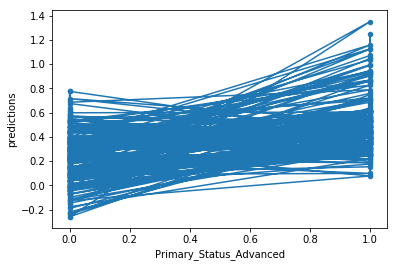

In [24]:
train_features.plot('Primary_Status_Advanced', 'predictions', kind="scatter")
plt.plot(train_features.Primary_Status_Advanced, train_features.predictions)
plt.show()